In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
df = pd.read_csv('gld_price_data.csv')


In [21]:
df.head(10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [22]:
df.shape

(2290, 6)

In [27]:
df = df.drop(columns=['Date'])

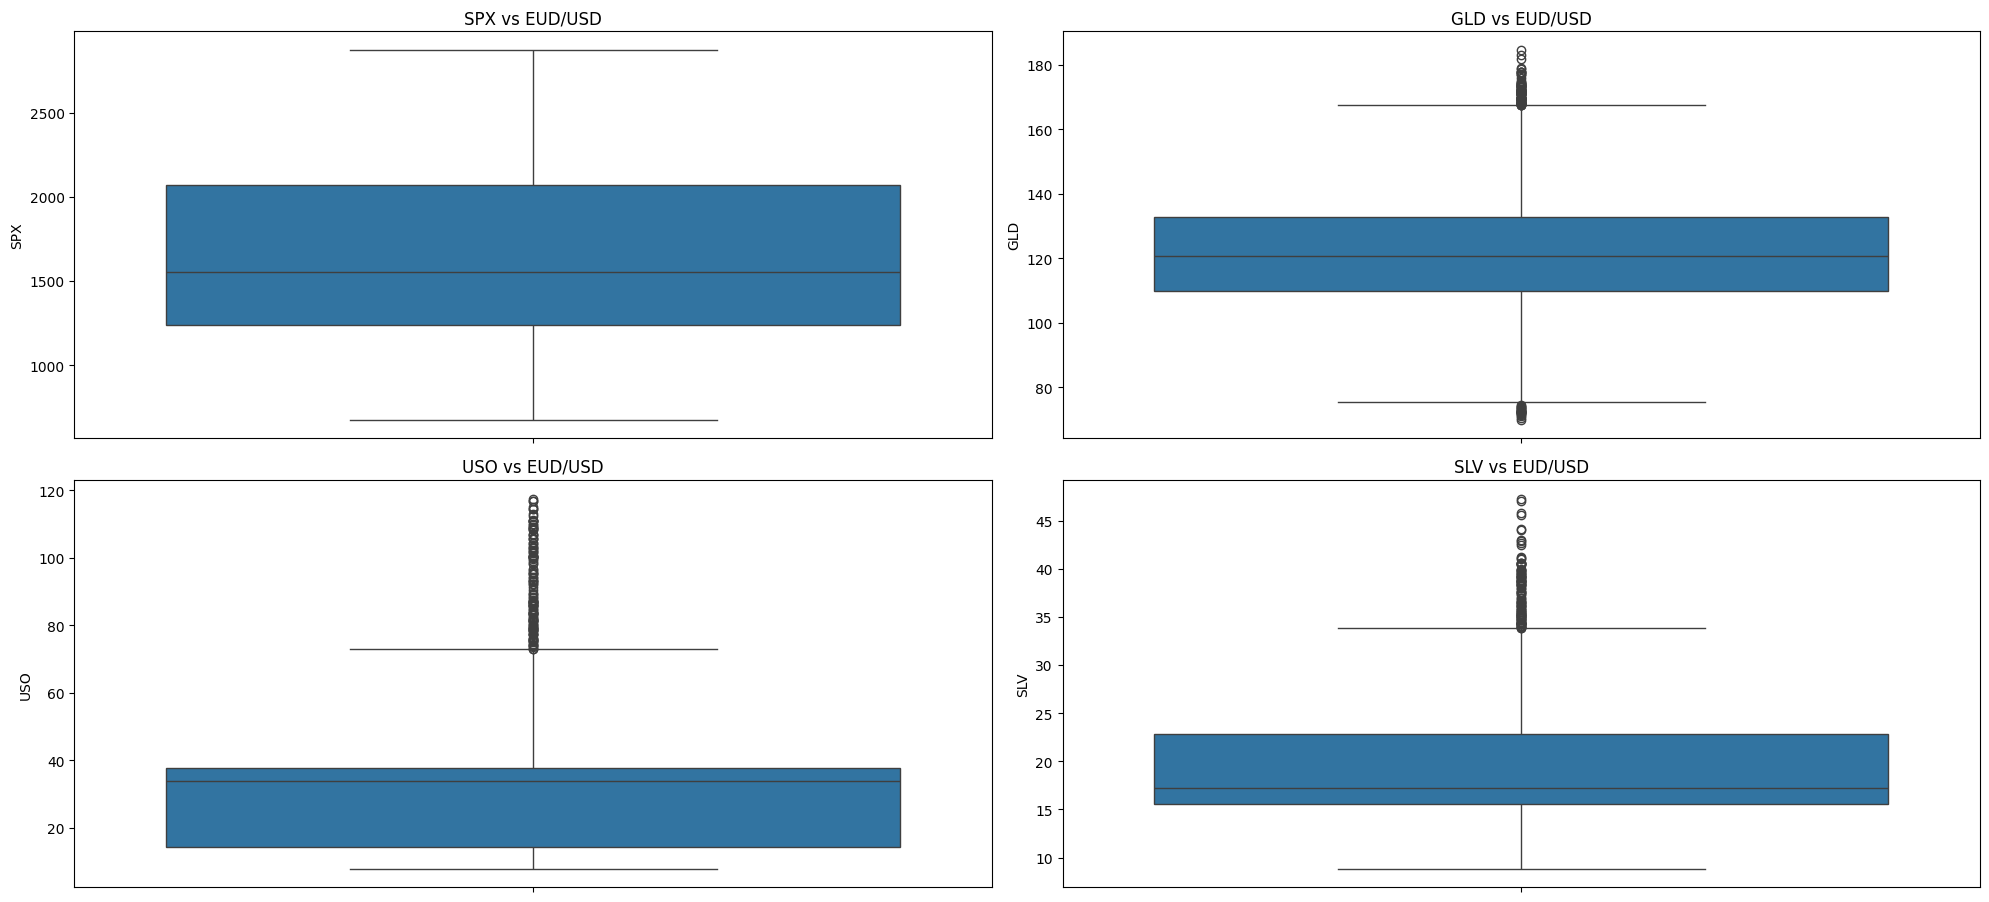

In [28]:


# List of variables to plot
features = ['SPX','GLD','USO','SLV']

# Create a figure to manage the layout
plt.figure(figsize=(20, 45))

# Loop through each feature and create a subplot
for i, feature in enumerate(features):
    plt.subplot(10, 2, i + 1)  # Adjust the grid parameters based on your list size
    sns.boxplot(y=feature, data=df)
    plt.title(f'{feature} vs EUD/USD')

plt.tight_layout()
plt.show()


In [29]:

correlation_matrix = df.corr()

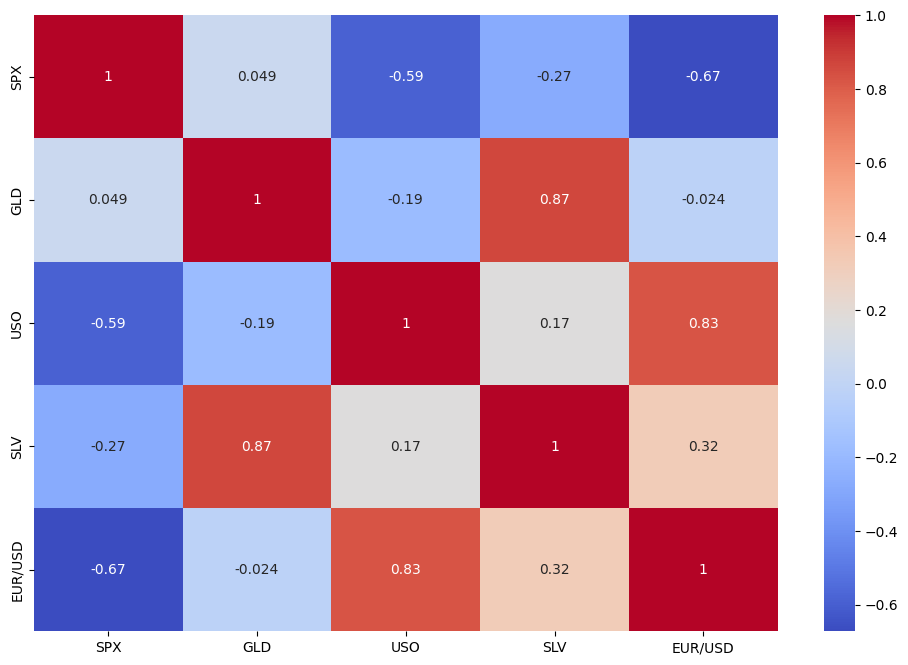

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [33]:
# split data into train set and test set 80:20
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_df = df.drop('EUR/USD', axis=1)
y_df = df['EUR/USD']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1832, 4), (458, 4), (1832,), (458,))

In [34]:
# scale the features using standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
def met(name,key,arg):
    print('Name of the model: ',name)
    print('R-square of the model:',r2_score(key,arg))
    print('RMSE of the model:',np.sqrt(mean_squared_error(key,arg)))
    print('MAE of the model:',mean_absolute_error(key,arg))

In [36]:
# LinearRegression
regr = LinearRegression()

regr.fit(X_train, y_train)

LinearRegression()

In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred_lr = regr.predict(X_test)

met('RFE MODEL and result for train',y_test, y_pred_lr)

Name of the model:  RFE MODEL and result for train
R-square of the model: 0.751702176929789
RMSE of the model: 0.06595130216633611
MAE of the model: 0.05540462018389776


## Model 


In [38]:
problem3_df = pd.read_csv('gld_price_data.csv')
problem3_df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [39]:
problem3_df = problem3_df.dropna()
X_df = df.drop('EUR/USD', axis=1)
y_df = df['EUR/USD']

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1832, 4), (458, 4), (1832,), (458,))

In [40]:
# define the hypothesis function
def hypothesis(X, weights):
    return np.dot(X, weights)

In [41]:
# define my model
# define the cost function
def cost(X, y, weights):
    return np.mean((hypothesis(X, weights) - y) ** 2)

# define the gradient decent function
def gradient_descent(X, y, weights, learning_rate, epochs):
    n = y.size
    cost_history = np.zeros(epochs)

    for i in range(epochs):
        weights = weights - learning_rate * (1/n) * np.dot(X.T, hypothesis(X, weights) - y)
        cost_history[i] = cost(X, y, weights)

    return weights, cost_history

# define the R2 score function
def r2_score(y_true, y_pred):
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (numerator / denominator)

# define the mean absolute error function
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# define the mean squared error function
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# define the feature scaling function
def scale(X):
    return (X - X.mean()) / X.std()

# scale the features
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# add the intercept term
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# initialize the weights
weights = np.random.rand(X_train_scaled.shape[1])

In [42]:
# define the learning rate and number of epochs
learning_rate = 0.01
epochs = 50000

# train the model
weights, cost_history = gradient_descent(X_train_scaled, y_train, weights, learning_rate, epochs)

In [43]:
# make predictions
y_pred = hypothesis(X_test_scaled, weights)

# evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

R2 score: 0.7527507433196661
Mean Absolute Error: 0.05503321140641843
Mean Squared Error: 0.00433120592331054


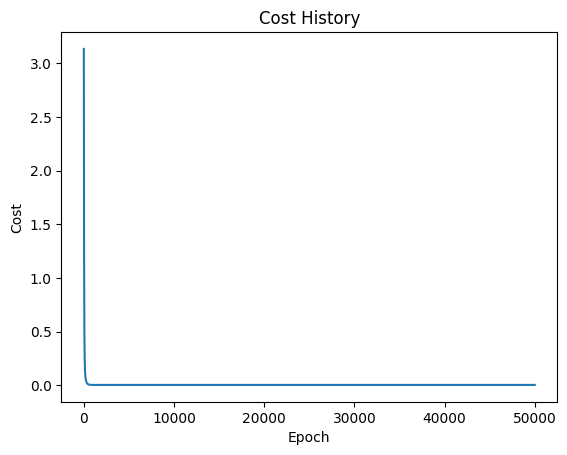

In [44]:
# plot the cost history
plt.plot(range(epochs), cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

In [45]:
# print the prediction compared to the actual values
for i in range(len(y_pred)):
    print(f'Prediction: {y_pred[i]:.2f}, Actual: {y_test.values[i]:.2f}')

Prediction: 1.12, Actual: 1.19
Prediction: 1.30, Actual: 1.38
Prediction: 1.30, Actual: 1.37
Prediction: 1.55, Actual: 1.54
Prediction: 1.14, Actual: 1.05
Prediction: 1.18, Actual: 1.11
Prediction: 1.11, Actual: 1.20
Prediction: 1.14, Actual: 1.06
Prediction: 1.17, Actual: 1.12
Prediction: 1.33, Actual: 1.47
Prediction: 1.28, Actual: 1.26
Prediction: 1.33, Actual: 1.31
Prediction: 1.35, Actual: 1.31
Prediction: 1.31, Actual: 1.26
Prediction: 1.33, Actual: 1.29
Prediction: 1.33, Actual: 1.35
Prediction: 1.29, Actual: 1.36
Prediction: 1.14, Actual: 1.04
Prediction: 1.15, Actual: 1.06
Prediction: 1.33, Actual: 1.38
Prediction: 1.28, Actual: 1.38
Prediction: 1.18, Actual: 1.07
Prediction: 1.32, Actual: 1.28
Prediction: 1.33, Actual: 1.36
Prediction: 1.16, Actual: 1.16
Prediction: 1.11, Actual: 1.24
Prediction: 1.12, Actual: 1.20
Prediction: 1.20, Actual: 1.24
Prediction: 1.34, Actual: 1.50
Prediction: 1.30, Actual: 1.34
Prediction: 1.47, Actual: 1.46
Prediction: 1.49, Actual: 1.46
Predicti

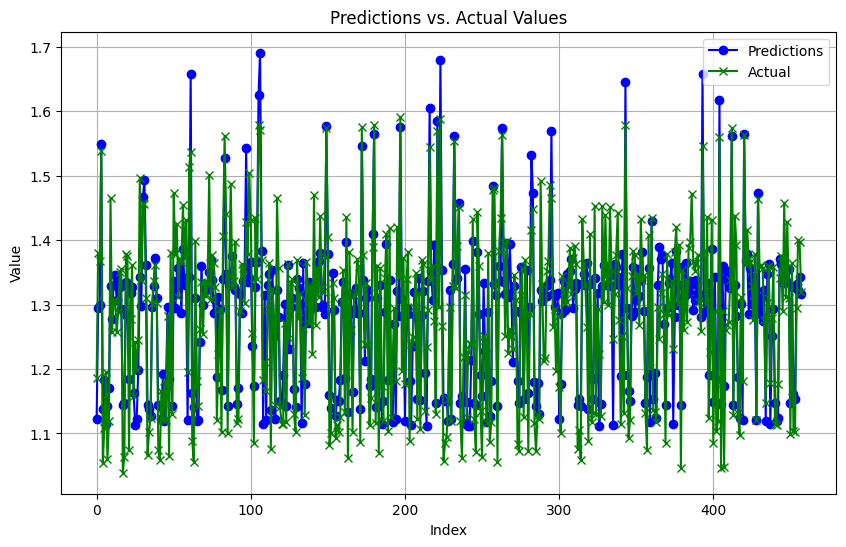

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_pred)), y_pred, label='Predictions', marker='o', color='blue')
plt.plot(range(len(y_pred)), y_test.values, label='Actual', marker='x', color='green')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predictions vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()

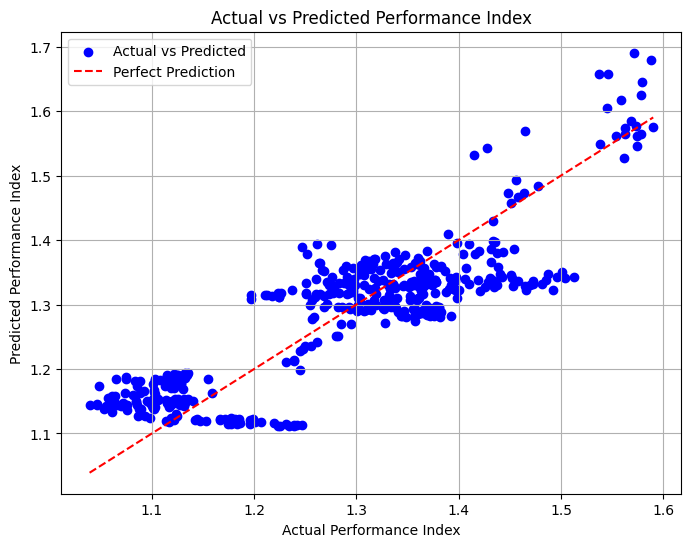

In [49]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Performance Index')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.legend()
plt.grid(True)
plt.show()